# Sentiment and Political Bias Analysis over Time

### Necessary Imports


In [48]:
import indicoio, json, re
from urlextract import URLExtract
import numpy as np
import matplotlib.pyplot as plt
import datetime
from scipy import stats
import pandas as pd
import plotly 
import pylab 
import scipy.stats as stats
import scipy


from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline




### Reading in the json file


In [49]:
with open('final_indico.json', 'r') as myfile:
    data = json.loads(myfile.read())



In [50]:
# Number of comments in our dataset
count = 0
for x in data['comments']:
    count += 1

print(count)
    

50500


In [51]:
print(data['comments']['t1_egfqmcp'])

{'body': 'the way you say died from guns makes it sound like these kids died from catching some illness  poor feller got guns and faded fast', 'timestamp': 1550118622.0, 'replies': ['t1_egfrgub', 't1_egfqud0', 't1_egfsx6q', 't1_eggaice', 't1_eggg53x', 't1_egglagb', 't1_eggrb49', 't1_egfsaxt', 't1_egg3ao2', 't1_egfqxvu', 't1_egfqvrn'], 'level': 1, 'id': 'egfqmcp', 'author': 'beetles-aint-real', 'pol_aff': {'Libertarian': 0.37192508578300476, 'Conservative': 0.2653159499168396, 'Liberal': 0.24580982327461243, 'Green': 0.11694913357496262}, 'sentiment': 0.06580359488928358}


### Reading data into local lists (timestamp, body_text, political, sentiment)


In [52]:

extractor = URLExtract()

timestamp = []
body_text = []
political = []
sentiment = []

for x in data['comments']:
    
    input_str = data['comments'][x]['body']
    
    if( 'timestamp' in data['comments'][x] and input_str and 'pol_aff' in data['comments'][x] 
       and 'sentiment' in data['comments'][x]):
        body_text.append(input_str)
        timestamp.append(data['comments'][x]['timestamp'])
        political.append(data['comments'][x]['pol_aff'])
        sentiment.append(data['comments'][x]['sentiment'])

    data['comments'][x]['body'] = input_str
    





### Converted timestamps to datetime objects


In [54]:

from datetime import datetime


time = []


macroTime = []

for x in timestamp:
    parsed_date = datetime.utcfromtimestamp(int(x))
    year = parsed_date.year
    month = parsed_date.month
    day = parsed_date.day
    hour = parsed_date.hour
    minute = parsed_date.minute
    customdate = datetime(year, month, day, hour, minute)
    time.append(customdate)
    
    

for x in timestamp:
    parsed_date = datetime.utcfromtimestamp(int(x))
    year = parsed_date.year
    month = parsed_date.month
    day = parsed_date.day


    customdate = datetime(year, month, day)
    macroTime.append(customdate)

### Labeling comments/replies using 0.7 political bias threshold for political bias & sentiment

In [55]:


liberal = []
conservative = []

sentimentLiberal = []
sentimentConservative = []

green = []
libertarian = []

sentiment_green = []
sentiment_libertarian = []

liberalDatetime = []
conservativeDatetime = []




for x in range(len(political)):
    if(political[x]['Liberal'] > 0.7):
        liberal.append(0)   # labeling replies/comments with 0 for liberal
        liberalDatetime.append(macroTime[x])
        
        if(sentiment[x] > 0.5):
            sentimentLiberal.append(1)  # labeling replies/comments with 1 for positive liberal
        else:
            sentimentLiberal.append(0)  # labeling replies/comments with 0 for negative liberal
        
    elif(political[x]['Conservative'] > 0.7):
        conservative.append(1)    # labeling replies/comments with 1 for conservative
        conservativeDatetime.append(macroTime[x])

        
        if(sentiment[x] > 0.5):
            sentimentConservative.append(2)   # labeling replies/comments with 2 for positive conservative
        else:
            sentimentConservative.append(-1)   # labeling replies/comments with -1 for negative conservative
        

        

totData = liberal + conservative
totSentiment = sentimentLiberal + sentimentConservative
totTime = liberalDatetime + conservativeDatetime






## Political Bias Analysis

In [56]:

freq = {}

for x in range(len(totTime)):
    value = totData[x]
    currDate = totTime[x]
    
    if(value == 0):
        if currDate in freq.keys():
            liberal = freq[currDate][0] + 1
            conservative = freq[currDate][1]
            temp = [liberal,conservative]
            freq.update({currDate : temp})
        else: 
            freq[currDate] = [0,0]
               
    else:
        if currDate in freq.keys(): 
            liberal = freq[currDate][0]
            conservative = freq[currDate][1] + 1
            temp = [liberal,conservative]
            freq.update({currDate : temp})


        else: 
            freq[currDate] = [0,0]

### Percentage Calculation for Political Bias Graph

In [57]:
newliberal = []
newconservative = []
refinedKeys = []
xaxis = []

            
for key, value in freq.items():
    if(value[0] != 0 and value[1] != 0):

        total = value[0] + value[1]
        if(total != 0):
            refinedKeys.append(key)
            xaxis.append(key.date())
            print(key,value)
            newliberal.append(value[0]/total)
            newconservative.append(value[1]/total)

2019-02-14 00:00:00 [9, 13]
2018-03-26 00:00:00 [7, 8]
2018-03-27 00:00:00 [1, 4]
2018-03-17 00:00:00 [12, 13]
2018-02-27 00:00:00 [4, 3]
2018-09-28 00:00:00 [2, 10]
2018-09-29 00:00:00 [43, 136]
2018-02-25 00:00:00 [32, 43]
2018-02-26 00:00:00 [55, 56]
2018-03-29 00:00:00 [329, 396]
2018-03-30 00:00:00 [12, 11]
2018-03-28 00:00:00 [10, 14]
2018-11-13 00:00:00 [55, 75]
2018-11-12 00:00:00 [29, 52]
2018-02-16 00:00:00 [86, 122]
2018-02-17 00:00:00 [12, 17]
2018-02-15 00:00:00 [135, 153]
2018-02-18 00:00:00 [3, 4]
2018-12-14 00:00:00 [4, 8]
2018-02-28 00:00:00 [1, 20]
2018-11-29 00:00:00 [1, 34]


### Pandas Dataframe to Sort By Date

In [58]:
df = pd.DataFrame([xaxis, newliberal, newconservative]).transpose()
df.columns = ['Date', 'LiberalBias','ConservativeBias']
df = df.sort_values(by=['Date'])
polBias = df
polBias

,Date,LiberalBias,ConservativeBias
16,2018-02-15,0.46875,0.53125
14,2018-02-16,0.413462,0.586538
15,2018-02-17,0.413793,0.586207
17,2018-02-18,0.428571,0.571429
7,2018-02-25,0.426667,0.573333
8,2018-02-26,0.495495,0.504505
4,2018-02-27,0.571429,0.428571
19,2018-02-28,0.047619,0.952381
3,2018-03-17,0.48,0.52
1,2018-03-26,0.466667,0.533333


### Data Visualiziation of Liberal and Conservative Bias

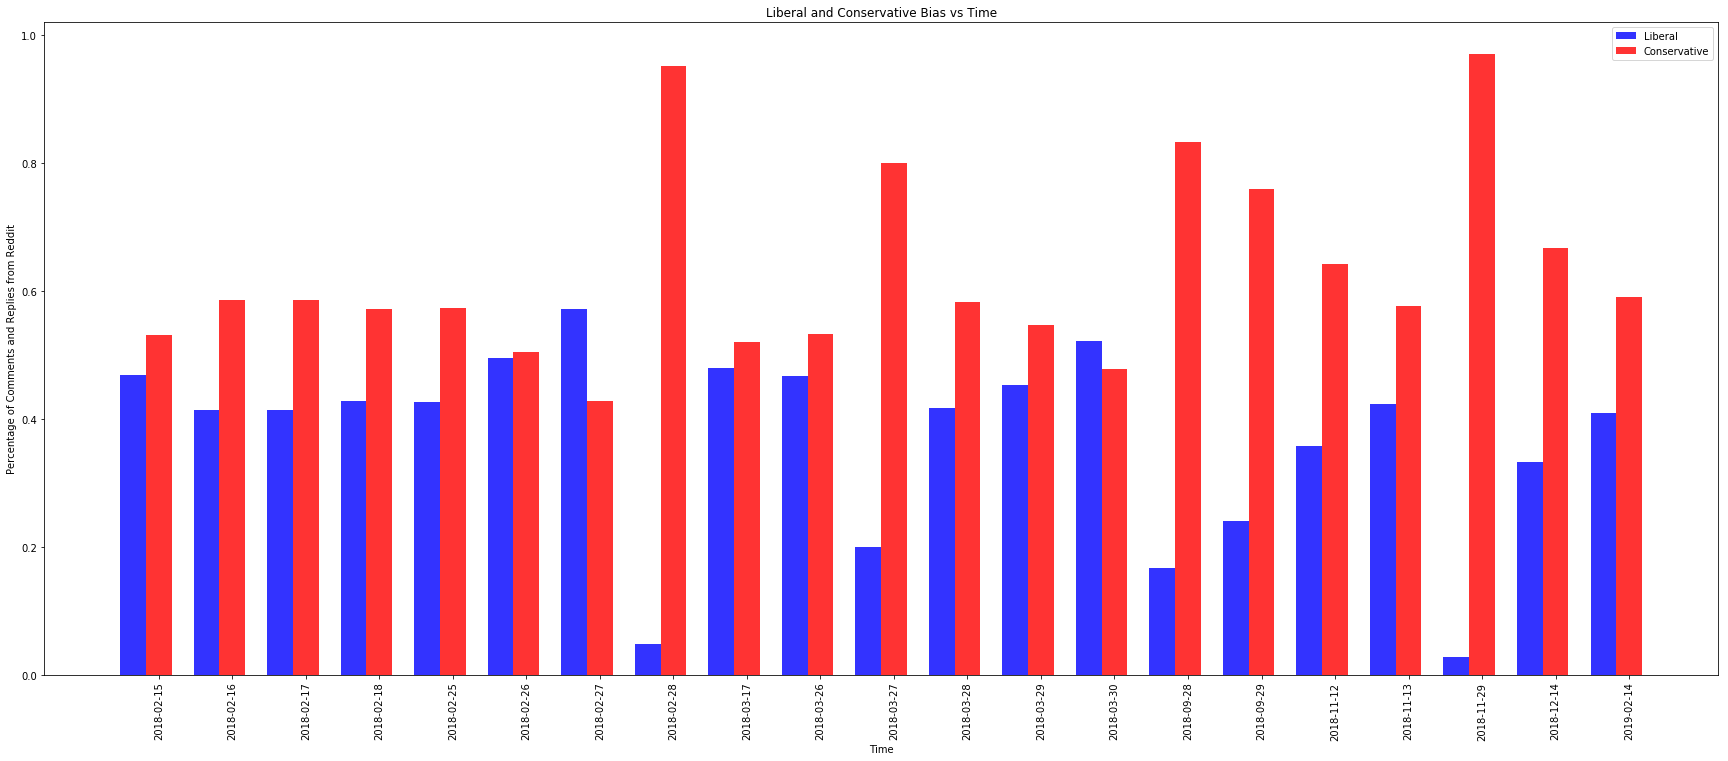

In [59]:
import numpy as np
import matplotlib.pyplot as plt
 
# data to plot
n_groups = len(refinedKeys)
means_frank = (df['LiberalBias'])
means_guido = (df['ConservativeBias'])
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, means_frank, bar_width,
alpha=opacity,
color='b',
label='Liberal')
 
rects2 = plt.bar(index + bar_width, means_guido, bar_width,
alpha=opacity,
color='r',
label='Conservative')
 
plt.xlabel('Time')
plt.ylabel('Percentage of Comments and Replies from Reddit')
plt.title('Liberal and Conservative Bias vs Time')
plt.xticks(index + bar_width, df['Date'], rotation="vertical")
plt.legend()
 
plt.show()

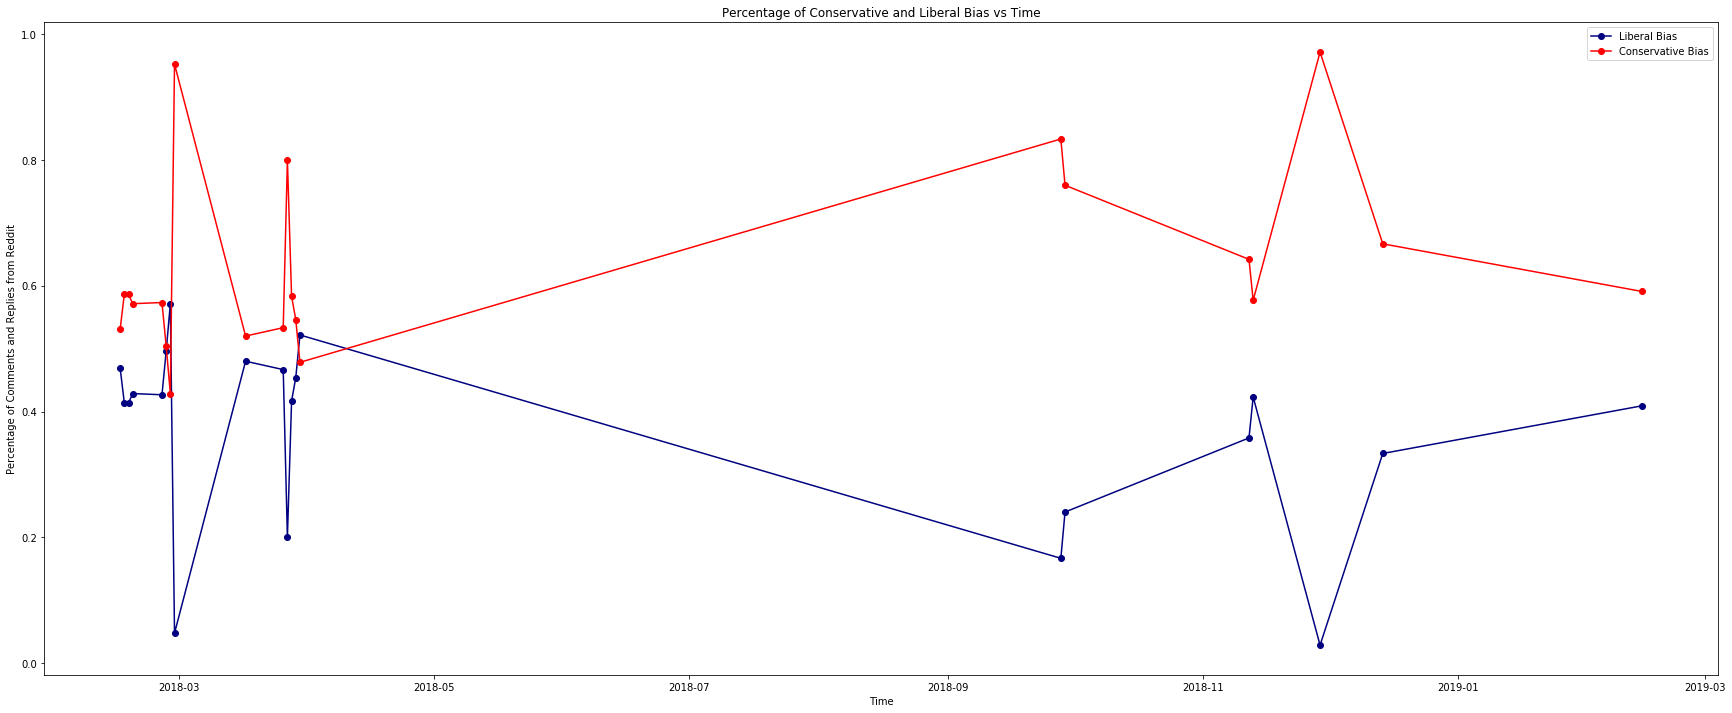

In [60]:
plt.plot( 'Date', 'LiberalBias' , data=polBias, linestyle='-', marker='o', c='navy',label='Liberal Bias')
plt.plot( 'Date', 'ConservativeBias' , data=polBias, linestyle='-', marker='o', c='red',label='Conservative Bias')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Percentage of Comments and Replies from Reddit')
plt.title('Percentage of Conservative and Liberal Bias vs Time')
plt.show()

### Wilcoxon Test for determining if liberal and conservative bias samples are statistically significant

In [61]:
print(scipy.stats.wilcoxon(polBias['LiberalBias'], polBias['ConservativeBias']))



WilcoxonResult(statistic=10.5, pvalue=0.00026241510509376545)


## Sentiment Analysis

In [62]:

freqSentiment = {}



for x in range(len(totTime)):
    value = totSentiment[x]
    currDate = totTime[x]
    
    if(value == 0):
        if currDate in freqSentiment.keys():
            temp = [freqSentiment[currDate][0]+1,freqSentiment[currDate][1],freqSentiment[currDate][2],freqSentiment[currDate][3]]
            freqSentiment.update({currDate : temp})
        else: 
            freqSentiment[currDate] = [1,0,0,0]
    elif(value == 1):
        if currDate in freqSentiment.keys(): 
            temp = [freqSentiment[currDate][0],freqSentiment[currDate][1]+1,freqSentiment[currDate][2],freqSentiment[currDate][3]]
            freqSentiment.update({currDate : temp})
        else: 
            freqSentiment[currDate] = [0,1,0,0]
    elif(value == -1):
        if currDate in freqSentiment.keys(): 
            #print(freq[currDate])
            temp = [freqSentiment[currDate][0],freqSentiment[currDate][1],freqSentiment[currDate][2]+1,freqSentiment[currDate][3]]
            freqSentiment.update({currDate : temp})
        else: 
            freqSentiment[currDate] = [0,0,1,0]
    elif(value == 2):
        if currDate in freqSentiment.keys(): 
            #print(freq[currDate])
            temp = [freqSentiment[currDate][0],freqSentiment[currDate][1],freqSentiment[currDate][2],freqSentiment[currDate][3]+1]
            freqSentiment.update({currDate : temp})
        else: 
            freqSentiment[currDate] = [0,0,0,1]

### Percentage Calculation for Sentiment Graph

In [63]:
negliberal = []
posliberal = []

negconservative = []
posconservative = []

refinedKeysSentiment = []

xaxisSenti = []
for key, value in freqSentiment.items():
    if(value[0] != 0 and value[1] != 0 and value[2] != 0 and value[3] != 0 
      and (value[0] > 1 and value[1] > 1 and value[2] > 1 and value[3] > 1) ):
        refinedKeysSentiment.append(key)
        xaxisSenti.append(key.date())
        print(key,value)
        totalLiberal = value[0] + value[1]
        negliberal.append(value[0]/totalLiberal)
        posliberal.append(value[1]/totalLiberal)
        totalConservative = value[2] + value[3]

        negconservative.append(value[2]/totalConservative)
        posconservative.append(value[3]/totalConservative)

        
index = [0,1,2,3,4,5,6,7,8,9,10,11,12,13]

2019-02-14 00:00:00 [6, 4, 8, 5]
2018-03-26 00:00:00 [5, 3, 5, 3]
2018-03-17 00:00:00 [9, 4, 11, 2]
2018-09-29 00:00:00 [32, 12, 101, 35]
2018-02-25 00:00:00 [21, 12, 30, 13]
2018-02-26 00:00:00 [33, 23, 34, 22]
2018-03-29 00:00:00 [240, 90, 288, 108]
2018-03-30 00:00:00 [7, 6, 8, 3]
2018-03-28 00:00:00 [8, 3, 11, 3]
2018-11-13 00:00:00 [34, 22, 53, 22]
2018-11-12 00:00:00 [23, 7, 34, 18]
2018-02-16 00:00:00 [70, 17, 89, 33]
2018-02-17 00:00:00 [7, 6, 14, 3]
2018-02-15 00:00:00 [99, 37, 107, 46]


### Pandas DataFrame for Sentiment

In [65]:
df = pd.DataFrame([xaxisSenti, refinedKeysSentiment, negliberal, posliberal, negconservative, posconservative]).transpose()
df.columns = ['Date', 'Datetime', 'NegLiberal','PosLiberal', 'NegConservative', 'PosConservative']
df = df.sort_values(by=['Date'])
sentimentDF = df


sentimentDF

,Date,Datetime,NegLiberal,PosLiberal,NegConservative,PosConservative
13,2018-02-15,2018-02-15 00:00:00,0.727941,0.272059,0.699346,0.300654
11,2018-02-16,2018-02-16 00:00:00,0.804598,0.195402,0.729508,0.270492
12,2018-02-17,2018-02-17 00:00:00,0.538462,0.461538,0.823529,0.176471
4,2018-02-25,2018-02-25 00:00:00,0.636364,0.363636,0.697674,0.302326
5,2018-02-26,2018-02-26 00:00:00,0.589286,0.410714,0.607143,0.392857
2,2018-03-17,2018-03-17 00:00:00,0.692308,0.307692,0.846154,0.153846
1,2018-03-26,2018-03-26 00:00:00,0.625,0.375,0.625,0.375
8,2018-03-28,2018-03-28 00:00:00,0.727273,0.272727,0.785714,0.214286
6,2018-03-29,2018-03-29 00:00:00,0.727273,0.272727,0.727273,0.272727
7,2018-03-30,2018-03-30 00:00:00,0.538462,0.461538,0.727273,0.272727


### Data Visualization for Liberal and Conservative Sentiment

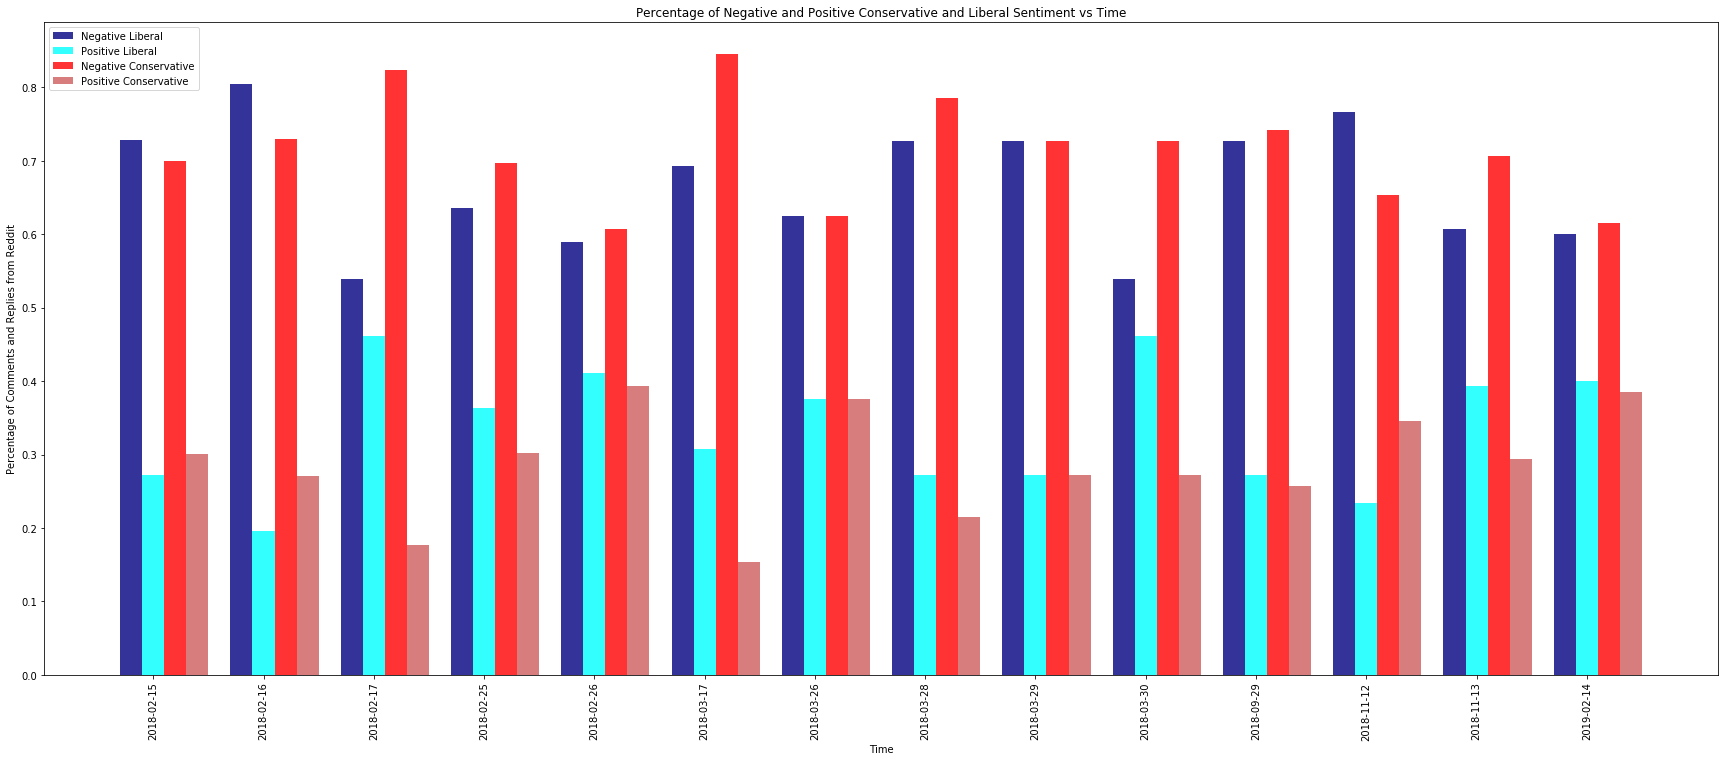

In [66]:
import numpy as np
import matplotlib.pyplot as plt
 
# data to plot
n_groups = len(refinedKeysSentiment)
means_frank = (df['NegLiberal'])
means_guido = (df['PosLiberal'])

means_negcon = (df['NegConservative'])
means_poscon = (df['PosConservative'])
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.2
opacity = 0.8
 
rects1 = plt.bar(index, means_frank, bar_width,
alpha=opacity,
color='navy',
label='Negative Liberal')
 
rects2 = plt.bar(index + (bar_width), means_guido, bar_width,
alpha=opacity,
color='aqua',
label='Positive Liberal')

rects3 = plt.bar(index + (2*bar_width), means_negcon, bar_width,
alpha=opacity,
color="red",
label='Negative Conservative')
 
rects4 = plt.bar(index + (3*bar_width), means_poscon, bar_width,
alpha=opacity,
color='indianred',
label='Positive Conservative')


 
plt.xlabel('Time')
plt.ylabel('Percentage of Comments and Replies from Reddit')
plt.title('Percentage of Negative and Positive Conservative and Liberal Sentiment vs Time')
plt.xticks(index + bar_width, df['Date'], rotation="vertical")
plt.legend()

plt.rcParams["figure.figsize"] = (30, 12)
plt.legend(loc=2)

plt.show()

### Wilcoxon Tests for determine statstical significance of sentiment analysis

In [67]:
print(scipy.stats.wilcoxon(sentimentDF['NegLiberal'], sentimentDF['PosLiberal']))
print(scipy.stats.wilcoxon(sentimentDF['NegConservative'], sentimentDF['PosConservative']))


print(scipy.stats.wilcoxon(sentimentDF['NegLiberal'], sentimentDF['NegConservative']))
print(scipy.stats.wilcoxon(sentimentDF['PosLiberal'], sentimentDF['PosConservative']))



WilcoxonResult(statistic=0.0, pvalue=0.0009674284502477448)
WilcoxonResult(statistic=0.0, pvalue=0.000978706525317055)
WilcoxonResult(statistic=20.0, pvalue=0.13609738111439368)
WilcoxonResult(statistic=20.0, pvalue=0.13609738111439368)


### Converting Datetime to Epoch for Models

In [68]:
import datetime
import numpy as np

date_epoch = []
epoch = datetime.datetime.utcfromtimestamp(0)

for x in sentimentDF['Datetime']:
    #print(x)
    date_epoch.append((x - epoch).total_seconds() * 1000.0)
    
    
date_epoch = np.reshape(date_epoch, (-1, 1)) 

### Polynomial Interpolation for Further Negative Liberal and Conservative Analysis

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning:

Ill-conditioned matrix (rcond=1.25043e-18): result may not be accurate.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning:

Ill-conditioned matrix (rcond=5.78892e-21): result may not be accurate.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning:

Ill-conditioned matrix (rcond=4.73209e-23): result may not be accurate.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning:

Ill-conditioned matrix (rcond=1.90635e-25): result may not be accurate.



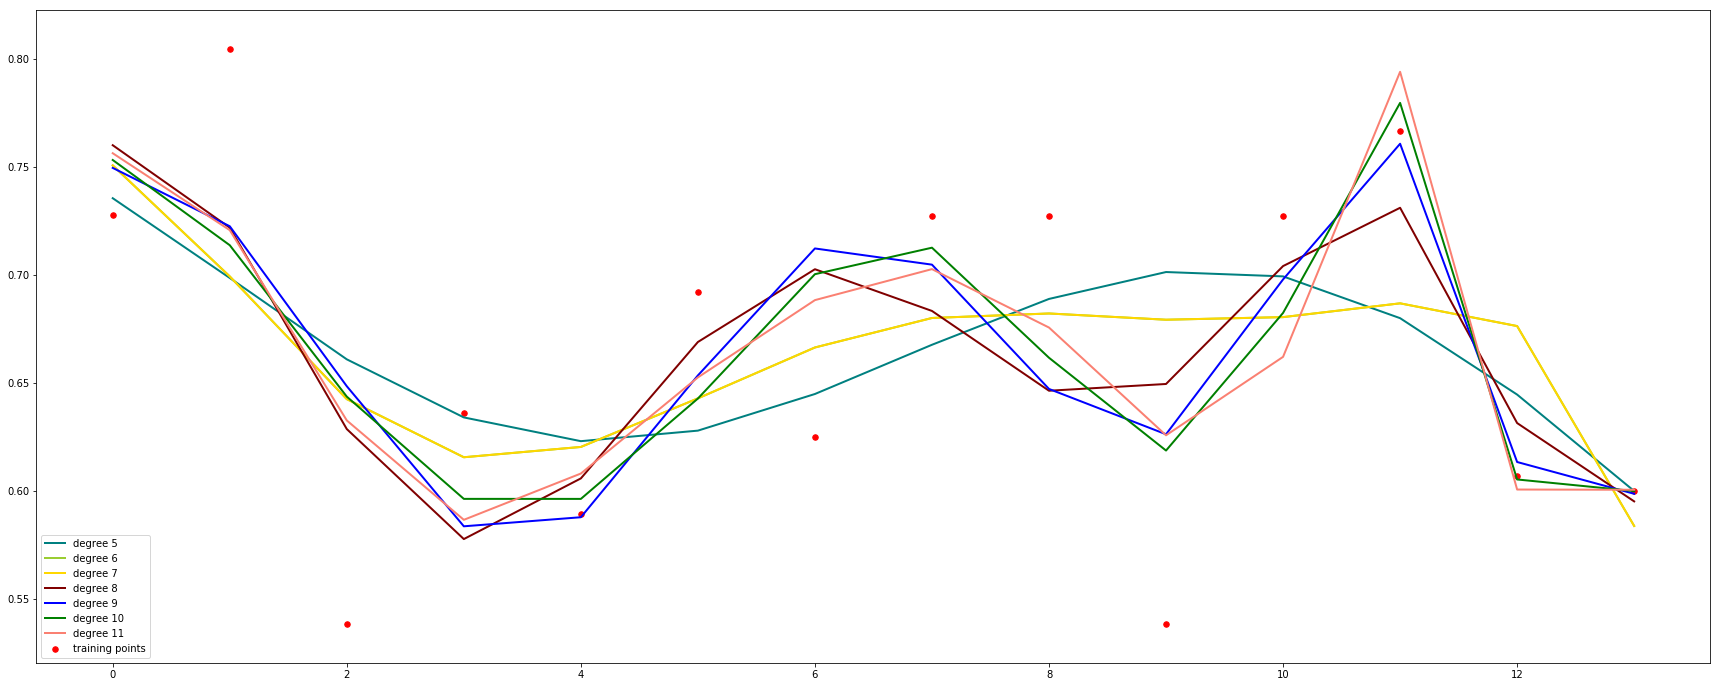

In [71]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline



index = [0,1,2,3,4,5,6,7,8,9,10,11,12,13]
index = np.reshape(index, (-1, 1)) 

colors = ['teal', 'yellowgreen', 'gold', 'maroon', 'blue', 'green', 'salmon']
#plt.plot(x_plot, f(x_plot), color='cornflowerblue', linewidth=2,
#         label="ground truth")
plt.scatter(index, sentimentDF['NegLiberal'], color='red', s=30, marker='o', label="training points")


for count, degree in enumerate([5, 6, 7, 8, 9, 10, 11]):
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(index, sentimentDF['NegLiberal'])
    y_plot = model.predict(index)
    plt.plot(index, y_plot, color=colors[count], linewidth=2,
             label="degree %d" % degree)

plt.legend(loc='lower left')

plt.show()

### Determining general trend of percentage of negative liberal and conservative comments/replies over time

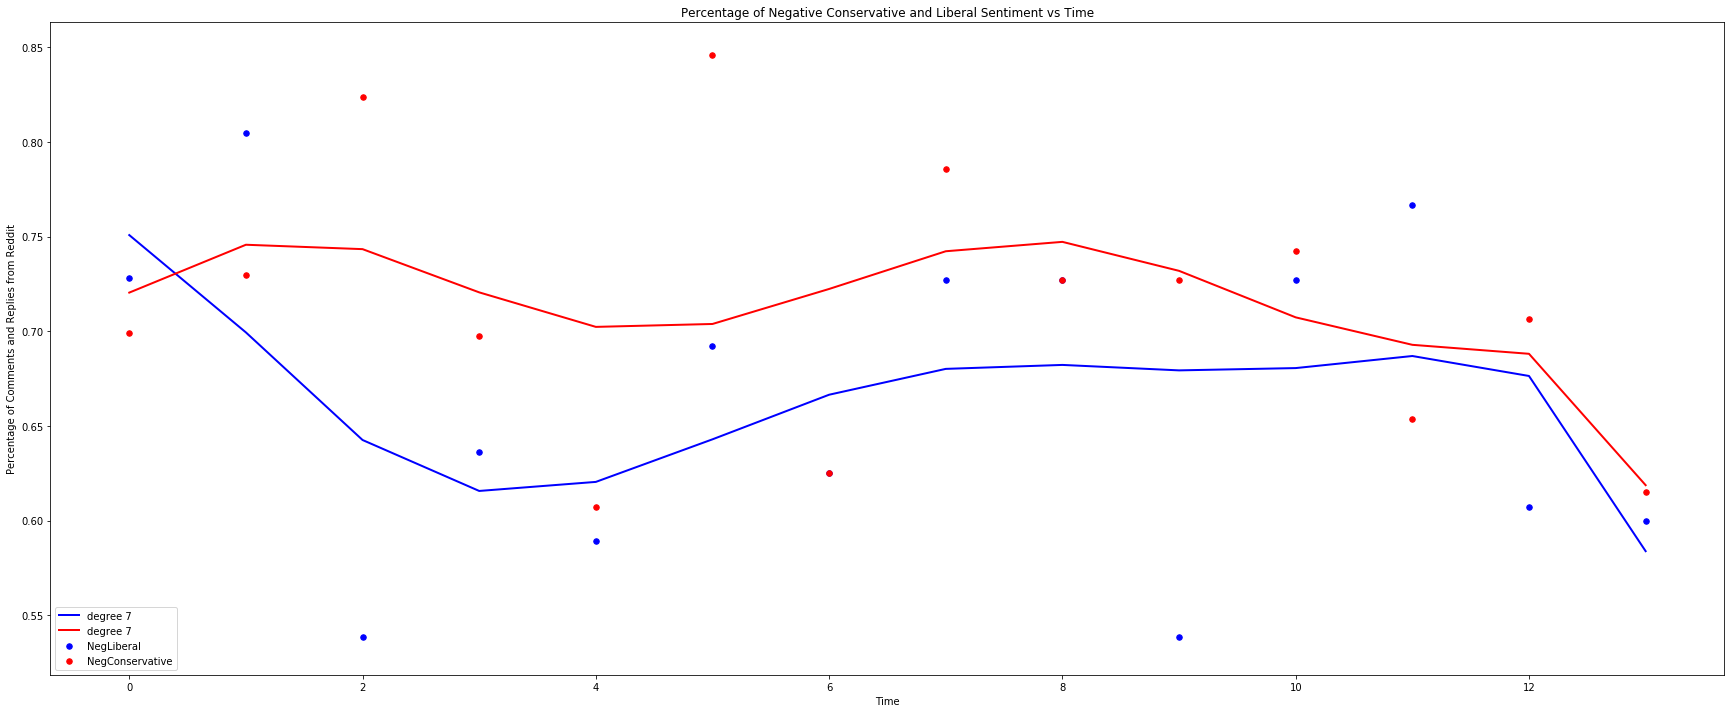

In [76]:



#plt.plot(x_plot, f(x_plot), color='cornflowerblue', linewidth=2,
#         label="ground truth")
plt.scatter(index, sentimentDF['NegLiberal'], color='blue', s=30, marker='o')
plt.scatter(index, sentimentDF['NegConservative'], color='red', s=30, marker='o')


for count, degree in enumerate([7]):
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(index, sentimentDF['NegLiberal'])
    y_plot = model.predict(index)
    plt.plot(index, y_plot, color='blue', linewidth=2,
             label="degree %d" % degree)
    
    model.fit(index, sentimentDF['NegConservative'])
    y_plot = model.predict(index)
    plt.plot(index, y_plot, color='red', linewidth=2,
             label="degree %d" % degree)

plt.legend(loc='lower left')
plt.xlabel('Time')
plt.ylabel('Percentage of Comments and Replies from Reddit')
plt.title('Percentage of Negative Conservative and Liberal Sentiment vs Time')
plt.show()